# Coordinates of the AISFMs


This example shows how to get locations of the STEREOs from the corresponding our AI-generated Solar Farside Magnetograms (AISFMs).

Here we use [Matplotlib](https://matplotlib.org), [Astropy](https://www.astropy.org), and [SunPy](https://sunpy.org) modules.

In [1]:
import matplotlib.pyplot as plt

from astropy.coordinates import SkyCoord
from astropy.io import fits
import astropy.units as u

from sunpy.coordinates import get_body_heliographic_stonyhurst


We start with a sample data obtained from the [KDC for SDO](http://sdo.kasi.re.kr/) website.

In [2]:
fits_aisfm = fits.open("./Sample_AISFMs/aisfm_v3_stereo_b_20110305_120403.fits")

fits_aisfm.info()

Filename: ./Sample_AISFMs/aisfm_v3_stereo_b_20110305_120403.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (1024, 1024)   float32   


In [3]:
data_aisfm = fits_aisfm[0].data
header_aisfm = fits_aisfm[0].header

fits_aisfm.close()

# We can also use the SunPy's Map to open the AISFMs.
#
# > import sunpy.map 
#
# > map_aisfm = sunpy.map.Map("./Sample_AISFMs/aisfm_v3_stereo_b_20110305_120403.fits") 
# > data_aisfm = map_aisfm.data
# > header_aisfm = map_aisfm.meta

In [4]:
SC_aisfm = header_aisfm["INPUTDAT"]
date_aisfm = header_aisfm['DATE-OBS']
lon_aisfm = header_aisfm['HGLN_OBS']
lat_aisfm = header_aisfm['HGLT_OBS']
dist_aisfm = header_aisfm['DSUN_OBS']

print("* Spacecraft: ", SC_aisfm)
print("* Longitude: ", lon_aisfm, " [degree]")
print("* Latitude: ", lat_aisfm, " [degree]")
print("* Distance: ", dist_aisfm, " [meter]")

* Spacecraft:  STEREO_B
* Longitude:  -94.78223699235252  [degree]
* Latitude:  1.076876540489728  [degree]
* Distance:  152041499485  [meter]


In [5]:
Coord_aisfm = SkyCoord(lon = lon_aisfm*u.deg,
                       lat = lat_aisfm*u.deg, 
                       radius = (dist_aisfm*u.m).to(u.au),
                       frame= 'heliographic_stonyhurst',
                       obstime= date_aisfm)

Coord_aisfm

<SkyCoord (HeliographicStonyhurst: obstime=2011-03-05T12:04:03.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (-94.78223699, 1.07687654, 1.01633465)>

In [6]:
Coord_Earth = get_body_heliographic_stonyhurst('earth', time = date_aisfm)

Coord_Earth

<HeliographicStonyhurst Coordinate (obstime=2011-03-05T12:04:03.000, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, AU)
    (0., -7.25010988, 0.99180635)>


We can plot the location of STEREO B with respect to the Sun.

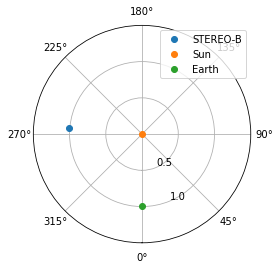

In [7]:
fig = plt.figure()

ax = plt.subplot(projection="polar")
ax.set_theta_zero_location("S")

#------------------------------------------------------------------
ax.plot(Coord_aisfm.lon.to("rad"), Coord_aisfm.radius,
        'o', label="STEREO-B")

ax.plot(0, 0,
        'o', label="Sun")

ax.plot(Coord_Earth.lon.to("rad"), Coord_Earth.radius,
        'o', label="Earth")

#------------------------------------------------------------------
ax.set_rticks([0.5, 1])
ax.set_rmax(1.5)

ax.legend()
plt.show()


You can try more examples by following the [SunPy Example Gallery](https://docs.sunpy.org/en/stable/generated/gallery/index.html).